In [2]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

import shap

In [4]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
data.shape

(303, 14)

<AxesSubplot:ylabel='Frequency'>

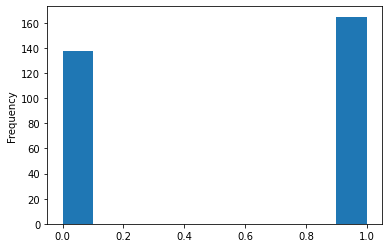

In [5]:
data['output'].plot(kind = 'hist')

In [6]:
y = data.output

X = data.drop('output', axis = 1)

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

In [12]:
model = RandomForestClassifier(random_state = 12).fit(X_train, y_train)
model

RandomForestClassifier(random_state=12)

In [13]:
explainer = shap.TreeExplainer(model)

shap_v = explainer.shap_values(X_valid)
shap_v

[array([[ 6.41217410e-02,  3.68282363e-02, -9.67661191e-02,
          7.38855308e-03, -1.92750864e-02,  1.22741092e-02,
         -1.24433519e-02, -2.76951820e-03, -2.97604794e-02,
          2.43356946e-02, -8.94244622e-02, -7.69141032e-02,
         -3.99505856e-02],
        [-4.19676955e-02,  1.86193079e-02, -7.69577790e-02,
         -5.16005479e-03, -1.62139005e-02,  1.22191935e-02,
         -8.51955533e-03, -4.78104568e-02, -3.12863086e-02,
         -7.04980779e-02, -5.84681273e-02, -7.71781712e-02,
         -4.91337464e-02],
        [-5.44871532e-02,  2.78568053e-02, -9.12214076e-02,
         -1.30810876e-02, -6.34245216e-04, -9.77528746e-04,
         -5.29663228e-03, -1.22115100e-02, -2.49503123e-02,
         -6.41312623e-02, -6.05297139e-02, -8.17474729e-02,
         -5.09438511e-02],
        [-4.39424933e-02, -5.17055582e-02, -8.62314560e-02,
         -1.93513747e-03,  6.52447456e-03, -1.84358054e-03,
         -4.93264507e-03,  3.02256043e-02, -3.02091552e-02,
         -6.0043080

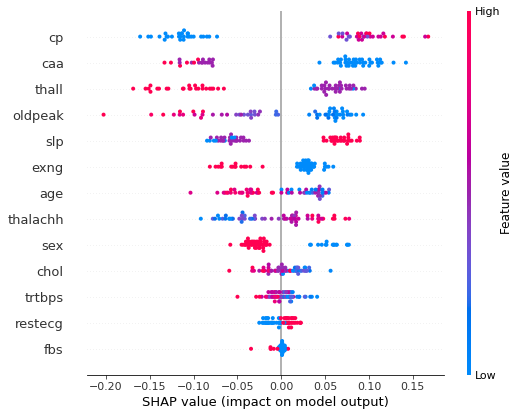

In [14]:
shap.summary_plot(shap_v[1], X_valid)